In [1]:
import os
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import load_model

# Data Frame Creation

In [2]:
tr_df_path="C:/Users/mbk02/Documents/Brain/Training"
labels=[]
filepaths=[]

folds=os.listdir(tr_df_path)
for fold in folds:
    foldpath=os.path.join(tr_df_path,fold)
    foldlist=os.listdir(foldpath)
    for file in foldlist:
        filepath=os.path.join(foldpath,file)
        
        labels.append(fold)
        filepaths.append(filepath)
        
        
l=pd.Series(labels,name="labels")
f=pd.Series(filepaths,name="filepaths")

tr_df=pd.concat([f,l],axis=1)

In [3]:
tr_df

,filepaths,labels
0,C:/Users/mbk02/Documents/Brain/Training\glioma...,glioma
1,C:/Users/mbk02/Documents/Brain/Training\glioma...,glioma
2,C:/Users/mbk02/Documents/Brain/Training\glioma...,glioma
3,C:/Users/mbk02/Documents/Brain/Training\glioma...,glioma
4,C:/Users/mbk02/Documents/Brain/Training\glioma...,glioma
...,...,...
5707,C:/Users/mbk02/Documents/Brain/Training\pituit...,pituitary
5708,C:/Users/mbk02/Documents/Brain/Training\pituit...,pituitary
5709,C:/Users/mbk02/Documents/Brain/Training\pituit...,pituitary
5710,C:/Users/mbk02/Documents/Brain/Training\pituit...,pituitary


In [4]:
tst_df_path="C:/Users/mbk02/Documents/Brain/Testing"
labels=[]
filepaths=[]

folds=os.listdir(tst_df_path)
for fold in folds:
    foldpath=os.path.join(tst_df_path,fold)
    foldlist=os.listdir(foldpath)
    for file in foldlist:
        filepath=os.path.join(foldpath,file)
        
        labels.append(fold)
        filepaths.append(filepath)
        
l=pd.Series(labels,name="labels")
f=pd.Series(filepaths,name="filepaths")

ts_df=pd.concat([f,l],axis=1)

In [5]:
ts_df

,filepaths,labels
0,C:/Users/mbk02/Documents/Brain/Testing\glioma\...,glioma
1,C:/Users/mbk02/Documents/Brain/Testing\glioma\...,glioma
2,C:/Users/mbk02/Documents/Brain/Testing\glioma\...,glioma
3,C:/Users/mbk02/Documents/Brain/Testing\glioma\...,glioma
4,C:/Users/mbk02/Documents/Brain/Testing\glioma\...,glioma
...,...,...
1306,C:/Users/mbk02/Documents/Brain/Testing\pituita...,pituitary
1307,C:/Users/mbk02/Documents/Brain/Testing\pituita...,pituitary
1308,C:/Users/mbk02/Documents/Brain/Testing\pituita...,pituitary
1309,C:/Users/mbk02/Documents/Brain/Testing\pituita...,pituitary


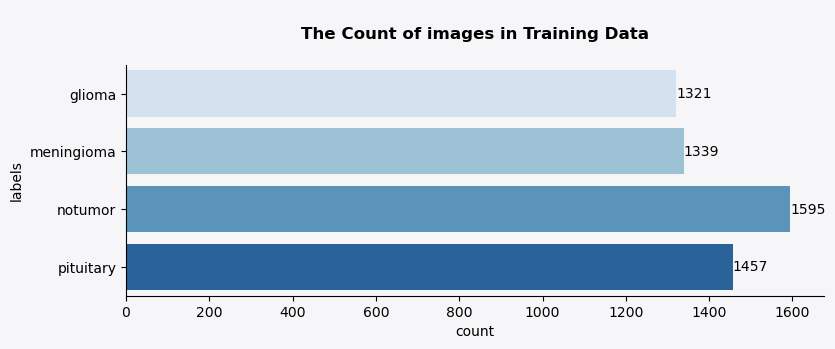

In [6]:
fig,ax=plt.subplots(figsize=(9,3))
fig.patch.set_facecolor("#f6f5f7")
ax.set_facecolor("#f6f5f7")
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
    
x = sns.countplot(data=tr_df, y=tr_df["labels"],palette='Blues')
for container in x.containers:
    x.bar_label(container)
plt.title("\nThe Count of images in Training Data\n",weight="bold");

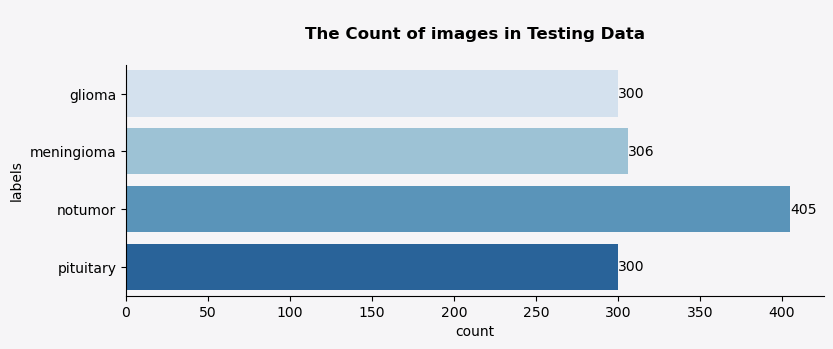

In [7]:
fig,ax=plt.subplots(figsize=(9,3))
fig.patch.set_facecolor("#f6f5f7")
ax.set_facecolor("#f6f5f7")
for i in ["right","top"]:
    ax.spines[i].set_visible(False)
    
i=sns.countplot(data=ts_df,y=ts_df["labels"],palette='Blues')
for container in i.containers:
    i.bar_label(container)
    
plt.title("\nThe Count of images in Testing Data\n",weight="bold");

In [8]:
ts_df.shape

(1311, 2)

# Test and Validation Split

In [9]:
valid_df,tst_df=train_test_split(ts_df,test_size=0.5,random_state=50,stratify=ts_df["labels"])
print(f"ts_df shape: {ts_df.shape}")
print("---"*10)
print(f"valid data shape: {valid_df.shape}")
print(f"test data shape: {tst_df.shape}")

ts_df shape: (1311, 2)
------------------------------
valid data shape: (655, 2)
test data shape: (656, 2)


In [10]:
valid_df

,filepaths,labels
624,C:/Users/mbk02/Documents/Brain/Testing\notumor...,notumor
1275,C:/Users/mbk02/Documents/Brain/Testing\pituita...,pituitary
383,C:/Users/mbk02/Documents/Brain/Testing\meningi...,meningioma
274,C:/Users/mbk02/Documents/Brain/Testing\glioma\...,glioma
808,C:/Users/mbk02/Documents/Brain/Testing\notumor...,notumor
...,...,...
603,C:/Users/mbk02/Documents/Brain/Testing\meningi...,meningioma
1143,C:/Users/mbk02/Documents/Brain/Testing\pituita...,pituitary
685,C:/Users/mbk02/Documents/Brain/Testing\notumor...,notumor
999,C:/Users/mbk02/Documents/Brain/Testing\notumor...,notumor


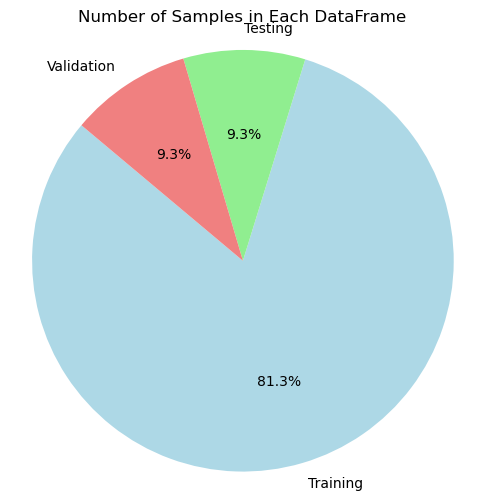

In [11]:
import matplotlib.pyplot as plt

tr_samples = len(tr_df)
tst_samples = len(tst_df)
valid_samples = len(valid_df)


sizes = [tr_samples, tst_samples, valid_samples]
labels = ['Training', 'Testing', 'Validation']
colors = ['lightblue', 'lightgreen', 'lightcoral']


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Number of Samples in Each DataFrame')
plt.axis('equal') 
plt.show()

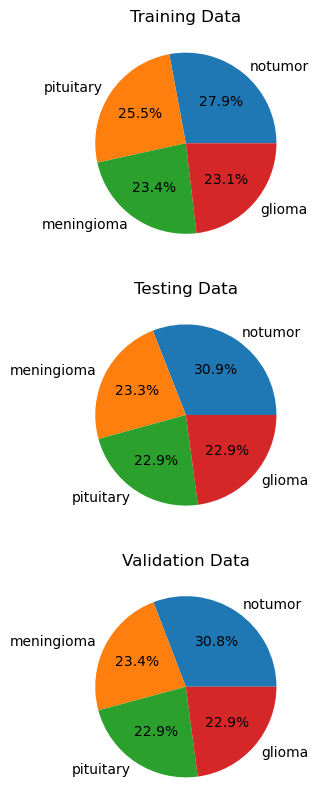

In [12]:
import matplotlib.pyplot as plt

tr_counts = tr_df['labels'].value_counts()
tst_counts = tst_df['labels'].value_counts()
valid_counts = valid_df['labels'].value_counts()

fig, axs = plt.subplots(3, 1, figsize=(16, 10))

axs[0].pie(tr_counts, labels=tr_counts.index, autopct='%1.1f%%')
axs[0].set_title('Training Data')


axs[1].pie(tst_counts, labels=tst_counts.index, autopct='%1.1f%%')
axs[1].set_title('Testing Data')


axs[2].pie(valid_counts, labels=valid_counts.index, autopct='%1.1f%%')
axs[2].set_title('Validation Data')


plt.show()


# Image Data Generation

In [13]:
img_size=(224,224)

tr=ImageDataGenerator()
ts=ImageDataGenerator()

train_gen=tr.flow_from_dataframe(tr_df,x_col="filepaths",y_col="labels",
                                 target_size=img_size,
                                 batch_size=16,shuffle=True,
                                 class_mode='categorical',color_mode="rgb",
                                 rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.1,
                                 zoom_range=0.1,
                                 horizontal_flip=True,
                                 fill_mode='nearest')


valid_gen=ts.flow_from_dataframe(valid_df,x_col='filepaths',y_col='labels',
                                target_size=img_size,
                                 batch_size=16,shuffle=True,
                                 class_mode='categorical',color_mode="rgb",
                                 rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.1,
                                 zoom_range=0.1,
                                 horizontal_flip=True,
                                 fill_mode='nearest')


test_gen=ts.flow_from_dataframe(tst_df, x_col='filepaths', y_col='labels',
                                 target_size=img_size,
                                 batch_size=16,shuffle=True,
                                 class_mode='categorical',color_mode="rgb",
                                 rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.1,
                                 zoom_range=0.1,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


# Sample Data

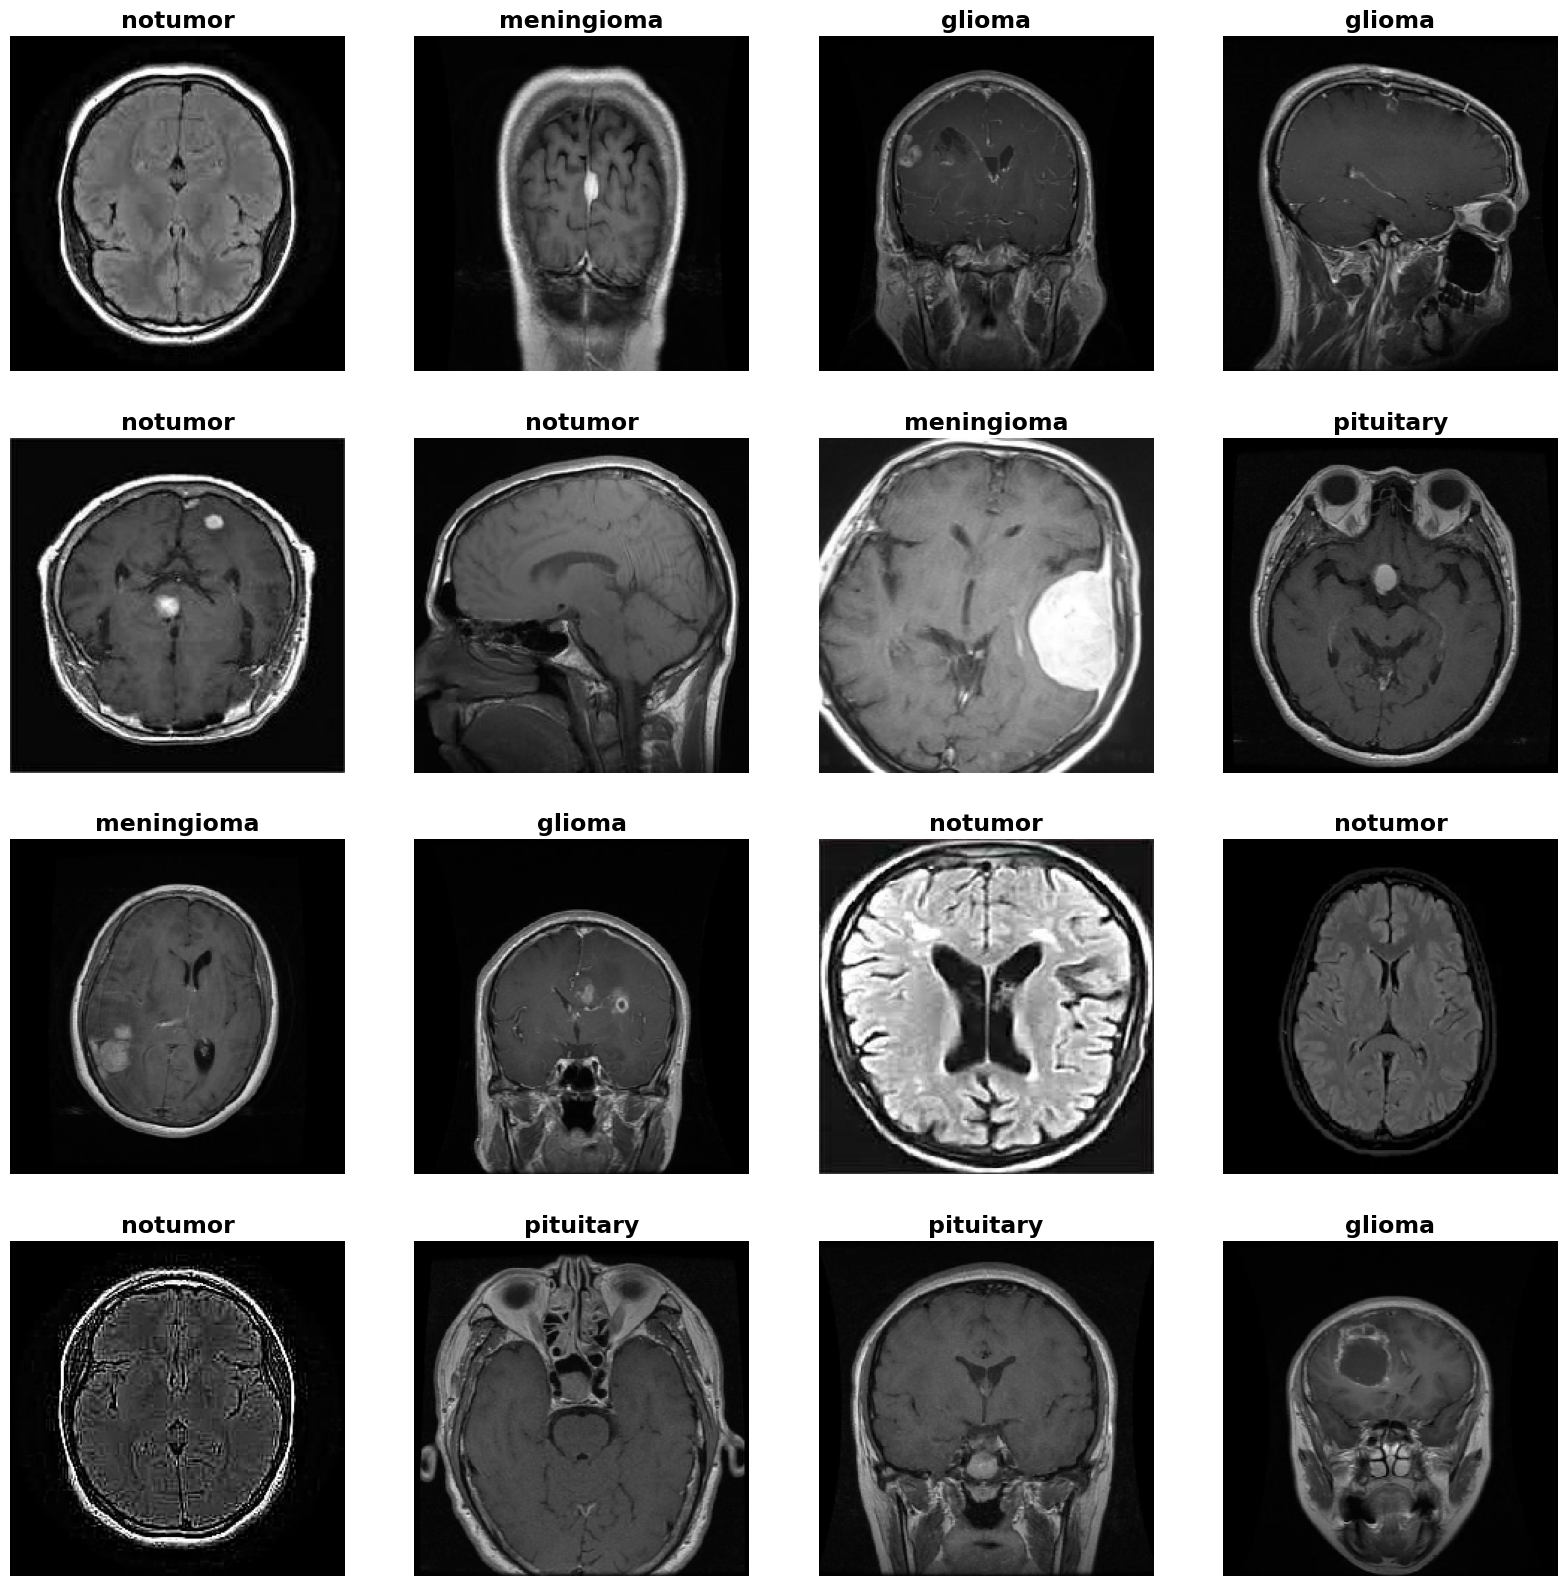

In [21]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'black' , fontsize= 17,weight="bold")
    plt.axis('off')
plt.show()

# VGG16 - Adam Optimizer

In [13]:
from keras.optimizers import Adam
from keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 524s 1s/step - loss: 4.3588 - accuracy: 0.8626 - auc: 0.9258 - precision: 0.8628 - recall: 0.8622 - val_loss: 0.2304 - val_accuracy: 0.9405 - val_auc: 0.9890 - val_precision: 0.9405 - val_recall: 0.9405
Epoch 2/5
357/357 [==============================] - 531s 1s/step - loss: 0.1667 - accuracy: 0.9578 - auc: 0.9926 - precision: 0.9581 - recall: 0.9576 - val_loss: 0.1264 - val_accuracy: 0.9557 - val_auc: 0.9959 - val_precision: 0.9586 - val_recall: 0.9542
Epoch 3/5
357/357 [==============================] - 535s 1s/step - loss: 0.0818 - accuracy: 0.9765 - auc: 0.9972 - precision: 0.9775 - recall: 0.9757 - val_loss: 0.1848 - val_accuracy: 0.9435 - val_auc: 0.9918 - val_precision: 0.9449 - val_recall: 0.9420
Epoch 4/5
357/357 [==============================] - 528s 1s/step - loss: 0.0960 - accuracy: 0.9771 - auc: 0.9960 - precision: 0.9774 - recall: 0.9769 - val_loss: 0.2759 - val_accuracy: 0.9527 - val_auc: 0.9871 - val_precision: 0.95

In [15]:
model.save('C:/Users/mbk02/Documents/Brain/Models/VGG16-Adam.h5')

# VGG16 - SGD Optimizer

In [16]:
from keras.optimizers import SGD
from keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [17]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 511s 1s/step - loss: 1.2753 - accuracy: 0.8466 - auc: 0.9579 - precision: 0.8561 - recall: 0.8346 - val_loss: 0.2809 - val_accuracy: 0.8962 - val_auc: 0.9849 - val_precision: 0.9037 - val_recall: 0.8885
Epoch 2/5
357/357 [==============================] - 515s 1s/step - loss: 0.1470 - accuracy: 0.9491 - auc: 0.9955 - precision: 0.9512 - recall: 0.9459 - val_loss: 0.2130 - val_accuracy: 0.9282 - val_auc: 0.9922 - val_precision: 0.9308 - val_recall: 0.9237
Epoch 3/5
357/357 [==============================] - 510s 1s/step - loss: 0.0696 - accuracy: 0.9760 - auc: 0.9989 - precision: 0.9775 - recall: 0.9753 - val_loss: 0.1072 - val_accuracy: 0.9634 - val_auc: 0.9973 - val_precision: 0.9631 - val_recall: 0.9573
Epoch 4/5
357/357 [==============================] - 507s 1s/step - loss: 0.0302 - accuracy: 0.9933 - auc: 0.9999 - precision: 0.9935 - recall: 0.9930 - val_loss: 0.0929 - val_accuracy: 0.9618 - val_auc: 0.9977 - val_precision: 0.96

In [18]:
model.save('C:/Users/mbk02/Documents/Brain/Models/VGG16-SGD.h5')

# VGG19 - Adam Optimizer

In [19]:
from keras.optimizers import Adam
from keras.applications import VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [20]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 594s 2s/step - loss: 2.2564 - accuracy: 0.8641 - auc: 0.9429 - precision: 0.8681 - recall: 0.8582 - val_loss: 0.2013 - val_accuracy: 0.9252 - val_auc: 0.9918 - val_precision: 0.9314 - val_recall: 0.9115
Epoch 2/5
357/357 [==============================] - 601s 2s/step - loss: 0.1400 - accuracy: 0.9533 - auc: 0.9954 - precision: 0.9555 - recall: 0.9505 - val_loss: 0.2367 - val_accuracy: 0.9221 - val_auc: 0.9915 - val_precision: 0.9276 - val_recall: 0.9191
Epoch 3/5
357/357 [==============================] - 603s 2s/step - loss: 0.0672 - accuracy: 0.9776 - auc: 0.9982 - precision: 0.9784 - recall: 0.9765 - val_loss: 0.2218 - val_accuracy: 0.9328 - val_auc: 0.9899 - val_precision: 0.9385 - val_recall: 0.9313
Epoch 4/5
357/357 [==============================] - 591s 2s/step - loss: 0.0743 - accuracy: 0.9774 - auc: 0.9979 - precision: 0.9777 - recall: 0.9764 - val_loss: 0.1834 - val_accuracy: 0.9481 - val_auc: 0.9931 - val_precision: 0.94

In [21]:
model.save('C:/Users/mbk02/Documents/Brain/Models/VGG19-Adam.h5')

# VGG19 - SGD Optimizer

In [22]:
from keras.optimizers import SGD
from keras.applications import VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [23]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 604s 2s/step - loss: 1.0447 - accuracy: 0.8405 - auc: 0.9598 - precision: 0.8561 - recall: 0.8269 - val_loss: 0.4152 - val_accuracy: 0.8504 - val_auc: 0.9714 - val_precision: 0.8742 - val_recall: 0.8168
Epoch 2/5
357/357 [==============================] - 599s 2s/step - loss: 0.1581 - accuracy: 0.9428 - auc: 0.9950 - precision: 0.9462 - recall: 0.9384 - val_loss: 0.2027 - val_accuracy: 0.9191 - val_auc: 0.9924 - val_precision: 0.9215 - val_recall: 0.9145
Epoch 3/5
357/357 [==============================] - 582s 2s/step - loss: 0.0852 - accuracy: 0.9718 - auc: 0.9985 - precision: 0.9728 - recall: 0.9697 - val_loss: 0.1746 - val_accuracy: 0.9374 - val_auc: 0.9937 - val_precision: 0.9402 - val_recall: 0.9359
Epoch 4/5
357/357 [==============================] - 564s 2s/step - loss: 0.0472 - accuracy: 0.9865 - auc: 0.9994 - precision: 0.9870 - recall: 0.9856 - val_loss: 0.1129 - val_accuracy: 0.9664 - val_auc: 0.9975 - val_precision: 0.96

In [24]:
model.save('C:/Users/mbk02/Documents/Brain/Models/VGG19-SGD.h5')

# Xception - Adam

In [26]:
from keras.optimizers import Adam
from keras.applications import Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [27]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 247s 686ms/step - loss: 8.2865 - accuracy: 0.7295 - auc: 0.8545 - precision: 0.7377 - recall: 0.7222 - val_loss: 1.2336 - val_accuracy: 0.7527 - val_auc: 0.9142 - val_precision: 0.8021 - val_recall: 0.7115
Epoch 2/5
357/357 [==============================] - 244s 682ms/step - loss: 0.4517 - accuracy: 0.8596 - auc: 0.9695 - precision: 0.8783 - recall: 0.8379 - val_loss: 0.4268 - val_accuracy: 0.8229 - val_auc: 0.9686 - val_precision: 0.8541 - val_recall: 0.7954
Epoch 3/5
357/357 [==============================] - 244s 685ms/step - loss: 0.2902 - accuracy: 0.8939 - auc: 0.9847 - precision: 0.9068 - recall: 0.8824 - val_loss: 0.5425 - val_accuracy: 0.8275 - val_auc: 0.9644 - val_precision: 0.8453 - val_recall: 0.8260
Epoch 4/5
357/357 [==============================] - 240s 673ms/step - loss: 0.2771 - accuracy: 0.9102 - auc: 0.9859 - precision: 0.9194 - recall: 0.8983 - val_loss: 0.3042 - val_accuracy: 0.8809 - val_auc: 0.9833 - val_pre

In [28]:
model.save('C:/Users/mbk02/Documents/Brain/Models/Xception-Adam.h5')

# Xception - SGD

In [29]:
from keras.optimizers import SGD
from keras.applications import Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_19 (Add)                   (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_18[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_19[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_22 (A

In [30]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 247s 687ms/step - loss: 1.7998 - accuracy: 0.6721 - auc: 0.8843 - precision: 0.7497 - recall: 0.5774 - val_loss: 0.6837 - val_accuracy: 0.7130 - val_auc: 0.9232 - val_precision: 0.7416 - val_recall: 0.6748
Epoch 2/5
357/357 [==============================] - 246s 689ms/step - loss: 0.4806 - accuracy: 0.8185 - auc: 0.9591 - precision: 0.8370 - recall: 0.7887 - val_loss: 0.5072 - val_accuracy: 0.7954 - val_auc: 0.9553 - val_precision: 0.8096 - val_recall: 0.7725
Epoch 3/5
357/357 [==============================] - 236s 660ms/step - loss: 0.3776 - accuracy: 0.8582 - auc: 0.9738 - precision: 0.8731 - recall: 0.8410 - val_loss: 0.4042 - val_accuracy: 0.8214 - val_auc: 0.9701 - val_precision: 0.8386 - val_recall: 0.8092
Epoch 4/5
357/357 [==============================] - 236s 660ms/step - loss: 0.3316 - accuracy: 0.8790 - auc: 0.9792 - precision: 0.8878 - recall: 0.8668 - val_loss: 0.3939 - val_accuracy: 0.8351 - val_auc: 0.9729 - val_pre

In [31]:
model.save('C:/Users/mbk02/Documents/Brain/Models/Xception-SGD.h5')

# EfficientNetB0 - Adam

In [32]:
from keras.optimizers import Adam
from keras.applications import EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_8[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0]']    

 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

In [33]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 157s 428ms/step - loss: 1.0942 - accuracy: 0.8624 - auc: 0.9551 - precision: 0.8659 - recall: 0.8589 - val_loss: 0.2865 - val_accuracy: 0.9023 - val_auc: 0.9838 - val_precision: 0.9062 - val_recall: 0.8992
Epoch 2/5
357/357 [==============================] - 156s 436ms/step - loss: 0.1404 - accuracy: 0.9512 - auc: 0.9949 - precision: 0.9523 - recall: 0.9503 - val_loss: 0.1726 - val_accuracy: 0.9389 - val_auc: 0.9928 - val_precision: 0.9403 - val_recall: 0.9374
Epoch 3/5
357/357 [==============================] - 154s 431ms/step - loss: 0.0940 - accuracy: 0.9671 - auc: 0.9975 - precision: 0.9681 - recall: 0.9666 - val_loss: 0.1333 - val_accuracy: 0.9511 - val_auc: 0.9956 - val_precision: 0.9511 - val_recall: 0.9511
Epoch 4/5
357/357 [==============================] - 152s 427ms/step - loss: 0.0967 - accuracy: 0.9671 - auc: 0.9970 - precision: 0.9681 - recall: 0.9669 - val_loss: 0.1757 - val_accuracy: 0.9389 - val_auc: 0.9929 - val_pre

In [34]:
model.save('C:/Users/mbk02/Documents/Brain/Models/EfficientNetB0-Adam.h5')

# EfficientNetB0 - SGD

In [35]:
from keras.optimizers import SGD
from keras.applications import EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_9[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

                                                                                                  
 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_b

 block4b_dwconv (DepthwiseConv2  (None, 14, 14, 480)  4320       ['block4b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePoolin

                                                                                                  
 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
          

                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
          

                                                                                                  
 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation) 

In [36]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 182s 497ms/step - loss: 0.3673 - accuracy: 0.8613 - auc: 0.9759 - precision: 0.8816 - recall: 0.8449 - val_loss: 0.2038 - val_accuracy: 0.9328 - val_auc: 0.9923 - val_precision: 0.9395 - val_recall: 0.9252
Epoch 2/5
357/357 [==============================] - 178s 497ms/step - loss: 0.1557 - accuracy: 0.9457 - auc: 0.9955 - precision: 0.9493 - recall: 0.9401 - val_loss: 0.1796 - val_accuracy: 0.9328 - val_auc: 0.9927 - val_precision: 0.9370 - val_recall: 0.9313
Epoch 3/5
357/357 [==============================] - 179s 502ms/step - loss: 0.0960 - accuracy: 0.9678 - auc: 0.9985 - precision: 0.9706 - recall: 0.9655 - val_loss: 0.1323 - val_accuracy: 0.9603 - val_auc: 0.9965 - val_precision: 0.9631 - val_recall: 0.9557
Epoch 4/5
357/357 [==============================] - 182s 509ms/step - loss: 0.0714 - accuracy: 0.9790 - auc: 0.9991 - precision: 0.9805 - recall: 0.9765 - val_loss: 0.1192 - val_accuracy: 0.9603 - val_auc: 0.9971 - val_pre

In [37]:
model.save('C:/Users/mbk02/Documents/Brain/Models/EfficientNetB0-SGD.h5')

# EfficientNetV2B0 - Adam

In [38]:
from keras.optimizers import Adam
from keras.applications import EfficientNetV2B0
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

24274472/24274472 [==============================] - 8s 0us/step
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_10[0][0]']               
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  0          ['rescaling_2[0][0]']            
 )                                                                                                
                           

                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 192)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_project_conv (Conv2D)  (None, 28, 28, 48)   9216        ['block3b_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3b_project_bn (BatchNorma  (None, 28, 28, 48)  192         ['block3b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3b_d

 block4b_drop (Dropout)         (None, 14, 14, 96)   0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_add (Add)              (None, 14, 14, 96)   0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_expand_conv (Conv2D)   (None, 14, 14, 384)  36864       ['block4b_add[0][0]']            
                                                                                                  
 block4c_expand_bn (BatchNormal  (None, 14, 14, 384)  1536       ['block4c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4c_e

 block5b_expand_activation (Act  (None, 14, 14, 672)  0          ['block5b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5b_dwconv2 (DepthwiseConv  (None, 14, 14, 672)  6048       ['block5b_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5b_bn (BatchNormalization  (None, 14, 14, 672)  2688       ['block5b_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5b_activation (Activation  (None, 14, 14, 672)  0          ['block5b_bn[0][0]']             
 )        

                                                                                                  
 block5d_bn (BatchNormalization  (None, 14, 14, 672)  2688       ['block5d_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5d_activation (Activation  (None, 14, 14, 672)  0          ['block5d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5d_se_squeeze (GlobalAver  (None, 672)         0           ['block5d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5d_s

 )                                                                                                
                                                                                                  
 block6a_se_squeeze (GlobalAver  (None, 672)         0           ['block6a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 672)    0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_se_reduce (Conv2D)     (None, 1, 1, 28)     18844       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block6a_se_reduce[0][0]']      
          

                                                                                                  
 block6c_se_excite (Multiply)   (None, 7, 7, 1152)   0           ['block6c_activation[0][0]',     
                                                                  'block6c_se_expand[0][0]']      
                                                                                                  
 block6c_project_conv (Conv2D)  (None, 7, 7, 192)    221184      ['block6c_se_excite[0][0]']      
                                                                                                  
 block6c_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6c_drop (Dropout)         (None, 7, 7, 192)    0           ['block6c_project_bn[0][0]']     
          

                                                                                                  
 block6e_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6e_drop (Dropout)         (None, 7, 7, 192)    0           ['block6e_project_bn[0][0]']     
                                                                                                  
 block6e_add (Add)              (None, 7, 7, 192)    0           ['block6e_drop[0][0]',           
                                                                  'block6d_add[0][0]']            
                                                                                                  
 block6f_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6e_add[0][0]']            
          

                                                                                                  
 block6g_add (Add)              (None, 7, 7, 192)    0           ['block6g_drop[0][0]',           
                                                                  'block6f_add[0][0]']            
                                                                                                  
 block6h_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6g_add[0][0]']            
                                                                                                  
 block6h_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block6h_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6h_expand_activation (Act  (None, 7, 7, 1152)  0           ['block6h_expand_bn[0][0]']      
 ivation) 

In [39]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 133s 360ms/step - loss: 0.9357 - accuracy: 0.8633 - auc: 0.9587 - precision: 0.8661 - recall: 0.8598 - val_loss: 0.2934 - val_accuracy: 0.9084 - val_auc: 0.9830 - val_precision: 0.9122 - val_recall: 0.9038
Epoch 2/5
357/357 [==============================] - 127s 354ms/step - loss: 0.1316 - accuracy: 0.9541 - auc: 0.9958 - precision: 0.9556 - recall: 0.9533 - val_loss: 0.1669 - val_accuracy: 0.9420 - val_auc: 0.9939 - val_precision: 0.9433 - val_recall: 0.9389
Epoch 3/5
357/357 [==============================] - 127s 356ms/step - loss: 0.0788 - accuracy: 0.9713 - auc: 0.9982 - precision: 0.9721 - recall: 0.9709 - val_loss: 0.2715 - val_accuracy: 0.9176 - val_auc: 0.9869 - val_precision: 0.9204 - val_recall: 0.9176
Epoch 4/5
357/357 [==============================] - 126s 353ms/step - loss: 0.0706 - accuracy: 0.9753 - auc: 0.9978 - precision: 0.9760 - recall: 0.9751 - val_loss: 0.0962 - val_accuracy: 0.9573 - val_auc: 0.9983 - val_pre

In [40]:
model.save('C:/Users/mbk02/Documents/Brain/Models/EfficientNetV2B0-Adam.h5')

# EfficientNetV2B0 - SGD

In [41]:
from keras.optimizers import SGD
from keras.applications import EfficientNetV2B0
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_11[0][0]']               
                                                                                                  
 normalization_3 (Normalization  (None, 224, 224, 3)  0          ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                           

 ivation)                                                                                         
                                                                                                  
 block3b_project_conv (Conv2D)  (None, 28, 28, 48)   9216        ['block3b_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3b_project_bn (BatchNorma  (None, 28, 28, 48)  192         ['block3b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3b_drop (Dropout)         (None, 28, 28, 48)   0           ['block3b_project_bn[0][0]']     
                                                                                                  
 block3b_a

 block4b_add (Add)              (None, 14, 14, 96)   0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_expand_conv (Conv2D)   (None, 14, 14, 384)  36864       ['block4b_add[0][0]']            
                                                                                                  
 block4c_expand_bn (BatchNormal  (None, 14, 14, 384)  1536       ['block4c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4c_expand_activation (Act  (None, 14, 14, 384)  0          ['block4c_expand_bn[0][0]']      
 ivation)                                                                                         
          

                                                                                                  
 block5b_dwconv2 (DepthwiseConv  (None, 14, 14, 672)  6048       ['block5b_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5b_bn (BatchNormalization  (None, 14, 14, 672)  2688       ['block5b_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5b_activation (Activation  (None, 14, 14, 672)  0          ['block5b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5b_s

 )                                                                                                
                                                                                                  
 block5d_activation (Activation  (None, 14, 14, 672)  0          ['block5d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5d_se_squeeze (GlobalAver  (None, 672)         0           ['block5d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5d_se_reshape (Reshape)   (None, 1, 1, 672)    0           ['block5d_se_squeeze[0][0]']     
                                                                                                  
 block5d_s

 block6a_se_squeeze (GlobalAver  (None, 672)         0           ['block6a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 672)    0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_se_reduce (Conv2D)     (None, 1, 1, 28)     18844       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block6a_se_reduce[0][0]']      
                                                                                                  
 block6a_se_excite (Multiply)   (None, 7, 7, 672)    0           ['block6a_activation[0][0]',     
          

                                                                  'block6c_se_expand[0][0]']      
                                                                                                  
 block6c_project_conv (Conv2D)  (None, 7, 7, 192)    221184      ['block6c_se_excite[0][0]']      
                                                                                                  
 block6c_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6c_drop (Dropout)         (None, 7, 7, 192)    0           ['block6c_project_bn[0][0]']     
                                                                                                  
 block6c_add (Add)              (None, 7, 7, 192)    0           ['block6c_drop[0][0]',           
          

 lization)                                                                                        
                                                                                                  
 block6e_drop (Dropout)         (None, 7, 7, 192)    0           ['block6e_project_bn[0][0]']     
                                                                                                  
 block6e_add (Add)              (None, 7, 7, 192)    0           ['block6e_drop[0][0]',           
                                                                  'block6d_add[0][0]']            
                                                                                                  
 block6f_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6e_add[0][0]']            
                                                                                                  
 block6f_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block6f_expand_conv[0][0]']    
 ization) 

                                                                  'block6f_add[0][0]']            
                                                                                                  
 block6h_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6g_add[0][0]']            
                                                                                                  
 block6h_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block6h_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6h_expand_activation (Act  (None, 7, 7, 1152)  0           ['block6h_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6h_d

In [42]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 129s 349ms/step - loss: 0.3529 - accuracy: 0.8696 - auc: 0.9773 - precision: 0.8882 - recall: 0.8524 - val_loss: 0.2362 - val_accuracy: 0.9176 - val_auc: 0.9890 - val_precision: 0.9234 - val_recall: 0.9023
Epoch 2/5
357/357 [==============================] - 120s 336ms/step - loss: 0.1387 - accuracy: 0.9522 - auc: 0.9964 - precision: 0.9565 - recall: 0.9475 - val_loss: 0.1604 - val_accuracy: 0.9466 - val_auc: 0.9943 - val_precision: 0.9508 - val_recall: 0.9435
Epoch 3/5
357/357 [==============================] - 115s 322ms/step - loss: 0.0971 - accuracy: 0.9690 - auc: 0.9982 - precision: 0.9715 - recall: 0.9667 - val_loss: 0.1285 - val_accuracy: 0.9527 - val_auc: 0.9968 - val_precision: 0.9525 - val_recall: 0.9496
Epoch 4/5
357/357 [==============================] - 121s 339ms/step - loss: 0.0627 - accuracy: 0.9802 - auc: 0.9995 - precision: 0.9817 - recall: 0.9781 - val_loss: 0.0980 - val_accuracy: 0.9679 - val_auc: 0.9984 - val_pre

In [43]:
model.save('C:/Users/mbk02/Documents/Brain/Models/EfficientNetV2B0-SGD.h5')

# ResNet50 - Adam

In [44]:
from keras.optimizers import Adam
from keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_12[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [45]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 289s 802ms/step - loss: 2.2303 - accuracy: 0.8754 - auc: 0.9442 - precision: 0.8762 - recall: 0.8725 - val_loss: 0.1965 - val_accuracy: 0.9206 - val_auc: 0.9932 - val_precision: 0.9367 - val_recall: 0.9038
Epoch 2/5
357/357 [==============================] - 291s 815ms/step - loss: 0.0986 - accuracy: 0.9660 - auc: 0.9970 - precision: 0.9677 - recall: 0.9648 - val_loss: 0.1698 - val_accuracy: 0.9344 - val_auc: 0.9939 - val_precision: 0.9344 - val_recall: 0.9344
Epoch 3/5
357/357 [==============================] - 298s 835ms/step - loss: 0.0820 - accuracy: 0.9739 - auc: 0.9970 - precision: 0.9742 - recall: 0.9736 - val_loss: 0.2241 - val_accuracy: 0.9420 - val_auc: 0.9858 - val_precision: 0.9434 - val_recall: 0.9420
Epoch 4/5
357/357 [==============================] - 288s 808ms/step - loss: 0.1081 - accuracy: 0.9699 - auc: 0.9956 - precision: 0.9707 - recall: 0.9695 - val_loss: 0.5442 - val_accuracy: 0.8870 - val_auc: 0.9640 - val_pre

In [46]:
model.save('C:/Users/mbk02/Documents/Brain/Models/ResNet50-Adam.h5')

# ResNet50 - SGD

In [47]:
from keras.optimizers import SGD
from keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_13[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [48]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 270s 750ms/step - loss: 0.4350 - accuracy: 0.8641 - auc: 0.9728 - precision: 0.8752 - recall: 0.8554 - val_loss: 0.2064 - val_accuracy: 0.9176 - val_auc: 0.9922 - val_precision: 0.9268 - val_recall: 0.9084
Epoch 2/5
357/357 [==============================] - 265s 743ms/step - loss: 0.1119 - accuracy: 0.9568 - auc: 0.9975 - precision: 0.9574 - recall: 0.9555 - val_loss: 0.1688 - val_accuracy: 0.9435 - val_auc: 0.9940 - val_precision: 0.9430 - val_recall: 0.9344
Epoch 3/5
357/357 [==============================] - 267s 748ms/step - loss: 0.0577 - accuracy: 0.9821 - auc: 0.9995 - precision: 0.9825 - recall: 0.9820 - val_loss: 0.1295 - val_accuracy: 0.9481 - val_auc: 0.9970 - val_precision: 0.9481 - val_recall: 0.9481
Epoch 4/5
357/357 [==============================] - 266s 746ms/step - loss: 0.0299 - accuracy: 0.9932 - auc: 0.9999 - precision: 0.9933 - recall: 0.9932 - val_loss: 0.0947 - val_accuracy: 0.9618 - val_auc: 0.9983 - val_pre

In [49]:
model.save('C:/Users/mbk02/Documents/Brain/Models/ResNet50-SGD.h5')

# ResNet50V2 - Adam

In [50]:
from keras.optimizers import Adam
from keras.applications import ResNet50V2
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_14[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

In [51]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 252s 698ms/step - loss: 122.1590 - accuracy: 0.7220 - auc: 0.8184 - precision: 0.7220 - recall: 0.7220 - val_loss: 26.1764 - val_accuracy: 0.7344 - val_auc: 0.8270 - val_precision: 0.7344 - val_recall: 0.7344
Epoch 2/5
357/357 [==============================] - 250s 702ms/step - loss: 7.4896 - accuracy: 0.8533 - auc: 0.9119 - precision: 0.8533 - recall: 0.8533 - val_loss: 13.5905 - val_accuracy: 0.8244 - val_auc: 0.8900 - val_precision: 0.8244 - val_recall: 0.8244
Epoch 3/5
357/357 [==============================] - 244s 684ms/step - loss: 4.5559 - accuracy: 0.8794 - auc: 0.9273 - precision: 0.8794 - recall: 0.8794 - val_loss: 5.4420 - val_accuracy: 0.8718 - val_auc: 0.9269 - val_precision: 0.8718 - val_recall: 0.8718
Epoch 4/5
357/357 [==============================] - 238s 666ms/step - loss: 1.7716 - accuracy: 0.6768 - auc: 0.8825 - precision: 0.8837 - recall: 0.5147 - val_loss: 1.6003 - val_accuracy: 0.6595 - val_auc: 0.8688 - val

In [52]:
model.save('C:/Users/mbk02/Documents/Brain/Models/ResNet50V2-Adam.h5')

# ResNet50V2 - SGD

In [53]:
from keras.optimizers import SGD
from keras.applications import ResNet50V2
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_15[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

In [54]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 229s 634ms/step - loss: 39783.5703 - accuracy: 0.2771 - auc: 0.5092 - precision: 0.2688 - recall: 0.0088 - val_loss: 1.3856 - val_accuracy: 0.3084 - val_auc: 0.5389 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
357/357 [==============================] - 229s 640ms/step - loss: 1.3857 - accuracy: 0.2792 - auc: 0.5195 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3849 - val_accuracy: 0.3084 - val_auc: 0.5389 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
357/357 [==============================] - 227s 636ms/step - loss: 1.3853 - accuracy: 0.2792 - auc: 0.5209 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3844 - val_accuracy: 0.3084 - val_auc: 0.5397 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
357/357 [==============================] - 227s 636ms/step - loss: 1.3850 - accuracy: 0.2792 - auc: 0.5256 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.383

In [56]:
model.save('C:/Users/mbk02/Documents/Brain/Models/ResNet50V2-SGD.h5')

# DenseNet121 - Adam

In [57]:
from keras.optimizers import Adam
from keras.applications import DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_16[0][0]']               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 28, 28, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 14, 14, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_relu (Activation)        (None, 14, 14, 1024  0           ['pool4_bn[0][0]']               
          

                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 7, 7, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 7, 7, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 7, 7, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 7, 7, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 7, 7, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block13_1_relu[0][0]']   
          

__________________________________________________________________________________________________


In [58]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 308s 846ms/step - loss: 5.5165 - accuracy: 0.8011 - auc: 0.8941 - precision: 0.8013 - recall: 0.8008 - val_loss: 1.1998 - val_accuracy: 0.8443 - val_auc: 0.9510 - val_precision: 0.8443 - val_recall: 0.8443
Epoch 2/5
357/357 [==============================] - 284s 797ms/step - loss: 0.5641 - accuracy: 0.8929 - auc: 0.9692 - precision: 0.8938 - recall: 0.8916 - val_loss: 1.1433 - val_accuracy: 0.8443 - val_auc: 0.9403 - val_precision: 0.8492 - val_recall: 0.8427
Epoch 3/5
357/357 [==============================] - 291s 815ms/step - loss: 0.3095 - accuracy: 0.9252 - auc: 0.9840 - precision: 0.9261 - recall: 0.9240 - val_loss: 0.5017 - val_accuracy: 0.8885 - val_auc: 0.9748 - val_precision: 0.8882 - val_recall: 0.8855
Epoch 4/5
357/357 [==============================] - 304s 852ms/step - loss: 0.1232 - accuracy: 0.9601 - auc: 0.9956 - precision: 0.9606 - recall: 0.9597 - val_loss: 0.4491 - val_accuracy: 0.9145 - val_auc: 0.9839 - val_pre

In [59]:
model.save('C:/Users/mbk02/Documents/Brain/Models/DenseNet121-Adam.h5')

# DenseNet121 - SGD

In [60]:
from keras.optimizers import SGD
from keras.applications import DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_17[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                          

 conv2_block4_0_relu (Activatio  (None, 56, 56, 160)  0          ['conv2_block4_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_blo

 conv3_block10_concat (Concaten  (None, 28, 28, 448)  0          ['conv3_block9_concat[0][0]',    
 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
          

                                                                                                  
 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block7_0_relu (Activatio  (None, 14, 14, 448)  0          ['conv4_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block15_2_conv[0][0]']   
                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 14, 14, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_rel

 ization)                                                                                         
                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 7, 7, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_blo

 conv5_block8_concat (Concatena  (None, 7, 7, 768)   0           ['conv5_block7_concat[0][0]',    
 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 7, 7, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 7, 7, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block9_0_relu[0][0]']    
          

 on)                                                                                              
                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 7, 7, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_blo

Total params: 19,883,844
Trainable params: 12,846,340
Non-trainable params: 7,037,504
__________________________________________________________________________________________________


In [61]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 294s 813ms/step - loss: 1.5014 - accuracy: 0.7526 - auc: 0.9252 - precision: 0.7962 - recall: 0.6956 - val_loss: 0.4742 - val_accuracy: 0.8351 - val_auc: 0.9599 - val_precision: 0.8511 - val_recall: 0.8031
Epoch 2/5
357/357 [==============================] - 295s 826ms/step - loss: 0.3544 - accuracy: 0.8699 - auc: 0.9766 - precision: 0.8834 - recall: 0.8526 - val_loss: 0.4535 - val_accuracy: 0.8412 - val_auc: 0.9643 - val_precision: 0.8542 - val_recall: 0.8229
Epoch 3/5
357/357 [==============================] - 291s 814ms/step - loss: 0.2619 - accuracy: 0.9074 - auc: 0.9869 - precision: 0.9140 - recall: 0.8983 - val_loss: 0.4783 - val_accuracy: 0.8534 - val_auc: 0.9628 - val_precision: 0.8646 - val_recall: 0.8382
Epoch 4/5
357/357 [==============================] - 291s 816ms/step - loss: 0.2222 - accuracy: 0.9170 - auc: 0.9898 - precision: 0.9232 - recall: 0.9111 - val_loss: 0.3116 - val_accuracy: 0.8763 - val_auc: 0.9799 - val_pre

In [62]:
model.save('C:/Users/mbk02/Documents/Brain/Models/DenseNet121-SGD.h5')

# InceptionV3 - Adam

In [63]:
from keras.optimizers import Adam
from keras.applications import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 111, 111, 32  864         ['input_18[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 111, 111, 32  96         ['conv2d_8[0][0]']               
 rmalization)                   )                                                          

 batch_normalization_13 (BatchN  (None, 25, 25, 64)  192         ['conv2d_13[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_15 (BatchN  (None, 25, 25, 64)  192         ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_18 (BatchN  (None, 25, 25, 96)  288         ['conv2d_18[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_19 (BatchN  (None, 25, 25, 32)  96          ['conv2d_19[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_30 (BatchN  (None, 25, 25, 64)  192         ['conv2d_30[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_30[0][0]'] 
                                                                                                  
 conv2d_28 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_31 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_8[0][0]']        
                                                                                                  
 conv2d_42 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_42 (BatchN  (None, 12, 12, 128)  384        ['conv2d_42[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_52 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_52 (BatchN  (None, 12, 12, 160)  480        ['conv2d_52[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_52[0][0]'] 
                                                                                                  
 conv2d_53 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_62[0][0]'] 
                                                                                                  
 conv2d_63 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_63 (BatchN  (None, 12, 12, 160)  480        ['conv2d_63[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_63[0][0]'] 
          

                                                                                                  
 batch_normalization_73 (BatchN  (None, 12, 12, 192)  576        ['conv2d_73[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_73[0][0]'] 
                                                                                                  
 conv2d_69 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_78 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_82 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_78 (BatchN  (None, 12, 12, 192)  576        ['conv2d_78[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_82 (BatchN  (None, 12, 12, 192)  576        ['conv2d_82[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_84 (BatchN  (None, 5, 5, 320)   960         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_90[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_99[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_100[0][0]']
                                                                                                  
 batch_normalization_101 (Batch  (None, 5, 5, 192)   576         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_93[0][0]'] 
                                                                                                  
 mixed9_1 

In [64]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 152s 417ms/step - loss: 26.5467 - accuracy: 0.7211 - auc: 0.8271 - precision: 0.7212 - recall: 0.7211 - val_loss: 3.5050 - val_accuracy: 0.8244 - val_auc: 0.9033 - val_precision: 0.8244 - val_recall: 0.8244
Epoch 2/5
357/357 [==============================] - 146s 409ms/step - loss: 2.7731 - accuracy: 0.8367 - auc: 0.9142 - precision: 0.8369 - recall: 0.8365 - val_loss: 3.0373 - val_accuracy: 0.8366 - val_auc: 0.9006 - val_precision: 0.8366 - val_recall: 0.8366
Epoch 3/5
357/357 [==============================] - 151s 423ms/step - loss: 1.4994 - accuracy: 0.8827 - auc: 0.9445 - precision: 0.8830 - recall: 0.8825 - val_loss: 1.8096 - val_accuracy: 0.8336 - val_auc: 0.9220 - val_precision: 0.8336 - val_recall: 0.8336
Epoch 4/5
357/357 [==============================] - 147s 411ms/step - loss: 0.6508 - accuracy: 0.9079 - auc: 0.9689 - precision: 0.9081 - recall: 0.9079 - val_loss: 0.8970 - val_accuracy: 0.8672 - val_auc: 0.9501 - val_pr

In [65]:
model.save('C:/Users/mbk02/Documents/Brain/Models/InceptionV3-Adam.h5')

# InceptionV3 - SGD

In [66]:
from keras.optimizers import SGD
from keras.applications import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
pred = Dense(4, activation='softmax')(x) 

model = tf.keras.Model(inputs=base_model.input, outputs=pred)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=additional_metrics)
model.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_102 (Conv2D)            (None, 111, 111, 32  864         ['input_19[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_102 (Batch  (None, 111, 111, 32  96         ['conv2d_102[0][0]']             
 Normalization)                 )                                                          

 conv2d_113 (Conv2D)            (None, 25, 25, 32)   6144        ['average_pooling2d_9[0][0]']    
                                                                                                  
 batch_normalization_107 (Batch  (None, 25, 25, 64)  192         ['conv2d_107[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_109 (Batch  (None, 25, 25, 64)  192         ['conv2d_109[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_112 (Batch  (None, 25, 25, 96)  288         ['conv2d_112[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_124 (Conv2D)            (None, 25, 25, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_124 (Batch  (None, 25, 25, 64)  192         ['conv2d_124[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_124[0][0]']
                                                                                                  
 conv2d_122 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_12

                                                                                                  
 activation_123 (Activation)    (None, 12, 12, 96)   0           ['batch_normalization_131[0][0]']
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_12[0][0]']       
                                                                                                  
 conv2d_13

 mixed4 (Concatenate)           (None, 12, 12, 768)  0           ['activation_124[0][0]',         
                                                                  'activation_127[0][0]',         
                                                                  'activation_132[0][0]',         
                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_146 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_146 (Batch  (None, 12, 12, 160)  480        ['conv2d_146[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_156 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_156 (Batch  (None, 12, 12, 160)  480        ['conv2d_156[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_156[0][0]']
                                                                                                  
 conv2d_157 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_157 (Batch  (None, 12, 12, 160)  480        ['conv2d_157[0][0]']             
 Normaliza

 activation_158 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_166[0][0]']
                                                                                                  
 conv2d_167 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_158[0][0]']         
                                                                                                  
 batch_normalization_167 (Batch  (None, 12, 12, 192)  576        ['conv2d_167[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_167[0][0]']
                                                                                                  
 conv2d_163 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_167 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_175[0][0]']
                                                                                                  
 conv2d_172 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_176 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_172 (Batch  (None, 12, 12, 192)  576        ['conv2d_172[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_186 (Conv2D)            (None, 5, 5, 192)    245760      ['average_pooling2d_16[0][0]']   
                                                                                                  
 batch_normalization_178 (Batch  (None, 5, 5, 320)   960         ['conv2d_178[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_180[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_181[0][0]']
          

                                                                                                  
 activation_181 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_189[0][0]']
                                                                                                  
 activation_182 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_190[0][0]']
                                                                                                  
 activation_185 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_193[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_194[0][0]']
                                                                                                  
 batch_normalization_195 (Batch  (None, 5, 5, 192)   576         ['conv2d_195[0][0]']             
 Normaliza

In [67]:
historyy=model.fit(train_gen,epochs=5,
                  validation_data=valid_gen, batch_size=32)

Epoch 1/5
357/357 [==============================] - 145s 398ms/step - loss: 39.2548 - accuracy: 0.4137 - auc: 0.7173 - precision: 0.5384 - recall: 0.1803 - val_loss: 1.2033 - val_accuracy: 0.3847 - val_auc: 0.7338 - val_precision: 0.6653 - val_recall: 0.2427
Epoch 2/5
357/357 [==============================] - 142s 398ms/step - loss: 1.0628 - accuracy: 0.4953 - auc: 0.8026 - precision: 0.6933 - recall: 0.2770 - val_loss: 1.1997 - val_accuracy: 0.4168 - val_auc: 0.7019 - val_precision: 0.9604 - val_recall: 0.1481
Epoch 3/5
357/357 [==============================] - 145s 407ms/step - loss: 1.0507 - accuracy: 0.4947 - auc: 0.8021 - precision: 0.8372 - recall: 0.2647 - val_loss: 0.9052 - val_accuracy: 0.6107 - val_auc: 0.8721 - val_precision: 0.7552 - val_recall: 0.3344
Epoch 4/5
357/357 [==============================] - 148s 416ms/step - loss: 0.9595 - accuracy: 0.5837 - auc: 0.8461 - precision: 0.7395 - recall: 0.3246 - val_loss: 0.9208 - val_accuracy: 0.6061 - val_auc: 0.8678 - val_pr

In [68]:
model.save('C:/Users/mbk02/Documents/Brain/Models/InceptionV3-SGD.h5')

# Model Testing - VGG16 - Adam

In [23]:
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]


In [24]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/VGG16-Adam.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=additional_metrics)

evaluation = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluation

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 74s 2s/step - loss: 0.1859 - accuracy: 0.9634 - auc: 0.9927 - precision: 0.9634 - recall: 0.9634
Accuracy: 0.9634146094322205
AUC: 0.9926720261573792
Precision: 0.9634146094322205
Recall: 0.9634146094322205
F1-Score: 0.9634146094322205


In [30]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/VGG16-SGD.h5')
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=additional_metrics)

evaluation = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluation

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 74s 2s/step - loss: 0.1206 - accuracy: 0.9604 - auc: 0.9943 - precision: 0.9626 - recall: 0.9619
Accuracy: 0.9603658318519592
AUC: 0.994267463684082
Precision: 0.9626239538192749
Recall: 0.9618902206420898
F1-Score: 0.9622569473604797


# VGG19

In [19]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/VGG19-Adam.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationvgg19a = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationvgg19a

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 98s 2s/step - loss: 0.3314 - accuracy: 0.9284 - auc: 0.9873 - precision: 0.9395 - recall: 0.9390
Accuracy: 0.9283536672592163
AUC: 0.987313985824585
Precision: 0.9394540786743164
Recall: 0.9389880895614624
F1-Score: 0.9392210263184381


In [20]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/VGG19-SGD.h5')
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationvgg19s = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationvgg19s

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 113s 3s/step - loss: 0.1184 - accuracy: 0.9588 - auc: 0.9896 - precision: 0.9446 - recall: 0.9439
Accuracy: 0.9588414430618286
AUC: 0.9895676970481873
Precision: 0.9445692896842957
Recall: 0.94386225938797
F1-Score: 0.9442156421797759


# Xception

In [21]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/Xception-Adam.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationxa = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationxa

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 47s 1s/step - loss: 0.3840 - accuracy: 0.8826 - auc: 0.9872 - precision: 0.9340 - recall: 0.9312
Accuracy: 0.8826219439506531
AUC: 0.9872491955757141
Precision: 0.9339963793754578
Recall: 0.9311898946762085
F1-Score: 0.9325910256130276


In [22]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/Xception-SGD.h5')
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationxs = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationxs

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 52s 1s/step - loss: 0.6558 - accuracy: 0.7637 - auc: 0.9833 - precision: 0.9082 - recall: 0.9011
Accuracy: 0.7637194991111755
AUC: 0.9833016395568848
Precision: 0.9081709980964661
Recall: 0.9011043906211853
F1-Score: 0.9046238940989202


# EfficientNetB0

In [23]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/EfficientNetB0-Adam.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationea = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationea

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 32s 611ms/step - loss: 0.1183 - accuracy: 0.9665 - auc: 0.9852 - precision: 0.9165 - recall: 0.9103
Accuracy: 0.9664633870124817
AUC: 0.9852070212364197
Precision: 0.9164677858352661
Recall: 0.9103448390960693
F1-Score: 0.9133960512937611


In [24]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/EfficientNetB0-SGD.h5')
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationes = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationes

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 32s 629ms/step - loss: 0.1038 - accuracy: 0.9573 - auc: 0.9867 - precision: 0.9215 - recall: 0.9156
Accuracy: 0.957317054271698
AUC: 0.9867377281188965
Precision: 0.9215127229690552
Recall: 0.9155966639518738
F1-Score: 0.9185451676928253


# EfficientNetV2B0

In [25]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/EfficientNetV2B0-Adam.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationeva = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationeva

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 27s 481ms/step - loss: 0.2117 - accuracy: 0.9497 - auc: 0.9872 - precision: 0.9246 - recall: 0.9194
Accuracy: 0.9496951103210449
AUC: 0.9872434735298157
Precision: 0.924636721611023
Recall: 0.9193548560142517
F1-Score: 0.9219882242162148


In [26]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/EfficientNetV2B0-SGD.h5')
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationevs = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationevs

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 28s 524ms/step - loss: 0.1074 - accuracy: 0.9619 - auc: 0.9881 - precision: 0.9285 - recall: 0.9236
Accuracy: 0.9618902206420898
AUC: 0.9880639314651489
Precision: 0.9284953474998474
Recall: 0.9235774874687195
F1-Score: 0.9260298882196593


# ResNet50

In [27]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/ResNet50-Adam.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationra = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationra

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 42s 935ms/step - loss: 0.1190 - accuracy: 0.9665 - auc: 0.9888 - precision: 0.9321 - recall: 0.9275
Accuracy: 0.9664633870124817
AUC: 0.9887851476669312
Precision: 0.932069718837738
Recall: 0.92745041847229
F1-Score: 0.9297543311705313


In [28]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/ResNet50-SGD.h5')
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationrs = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationrs

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 43s 948ms/step - loss: 0.0945 - accuracy: 0.9604 - auc: 0.9896 - precision: 0.9344 - recall: 0.9302
Accuracy: 0.9603658318519592
AUC: 0.9895609617233276
Precision: 0.9344241619110107
Recall: 0.9301767945289612
F1-Score: 0.9322956406890345


# ResNet50V2

In [31]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/ResNet50V2-Adam.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationrva = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationrva

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 34s 755ms/step - loss: 0.9770 - accuracy: 0.4390 - auc: 0.9638 - precision: 0.9659 - recall: 0.7475
Accuracy: 0.4390243887901306
AUC: 0.9637932181358337
Precision: 0.9658568501472473
Recall: 0.747459352016449
F1-Score: 0.8427384675870045


In [30]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/ResNet50V2-SGD.h5')
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationrvs = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationrvs

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 32s 706ms/step - loss: 1.3834 - accuracy: 0.3095 - auc: 0.9772 - precision: 0.9358 - recall: 0.8206
Accuracy: 0.30945122241973877
AUC: 0.9771560430526733
Precision: 0.9357707500457764
Recall: 0.8206239342689514
F1-Score: 0.8744229088531789


# DenseNet121

In [31]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/DenseNet121-Adam.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationda = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationda

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 28s 627ms/step - loss: 0.2632 - accuracy: 0.9253 - auc: 0.9782 - precision: 0.9350 - recall: 0.8276
Accuracy: 0.9253048896789551
AUC: 0.9781538844108582
Precision: 0.9349862933158875
Recall: 0.827568769454956
F1-Score: 0.8780042933810798


In [32]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/DenseNet121-SGD.h5')
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationds = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationds

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 31s 695ms/step - loss: 0.1966 - accuracy: 0.9253 - auc: 0.9791 - precision: 0.9345 - recall: 0.8336
Accuracy: 0.9253048896789551
AUC: 0.9791329503059387
Precision: 0.934502899646759
Recall: 0.8335546255111694
F1-Score: 0.8811469123263702


# InceptionV3

In [33]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/InceptionV3-Adam.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationia = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationia

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 14s 303ms/step - loss: 1.0263 - accuracy: 0.8399 - auc: 0.9768 - precision: 0.9291 - recall: 0.8334
Accuracy: 0.8399389982223511
AUC: 0.9768088459968567
Precision: 0.9291260242462158
Recall: 0.833392858505249
F1-Score: 0.8786595148976455


In [39]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/InceptionV3-SGD.h5')
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=additional_metrics)

evaluationis = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluationis

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

41/41 [==============================] - 23s 469ms/step - loss: 1.0813 - accuracy: 0.4832 - auc: 0.9331 - precision: 0.9427 - recall: 0.6330
Accuracy: 0.48323169350624084
AUC: 0.9330897331237793
Precision: 0.9426787495613098
Recall: 0.6330030560493469
F1-Score: 0.7574099379967484


# Visualization

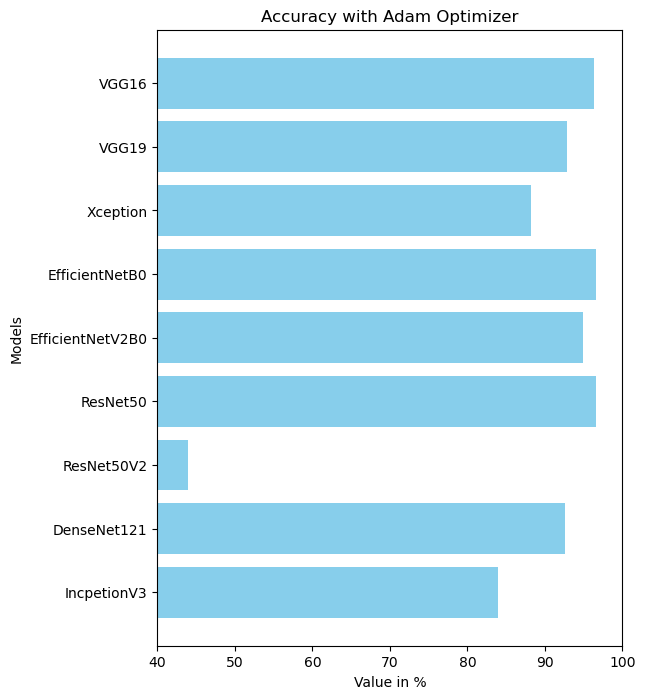

In [40]:
Models = ['IncpetionV3', 'DenseNet121','ResNet50V2', 'ResNet50', 'EfficientNetV2B0', 'EfficientNetB0', 'Xception', 'VGG19', 'VGG16']
Scores = [83.99, 92.53,43.9, 96.64, 94.96, 96.64, 88.26, 92.83, 96.34]
plt.figure(figsize=(6, 8))
plt.barh(Models, Scores, color='skyblue')
plt.xlim(40, 100)
plt.ylabel('Models')
plt.xlabel('Value in %')
plt.title('Accuracy with Adam Optimizer')
plt.show()

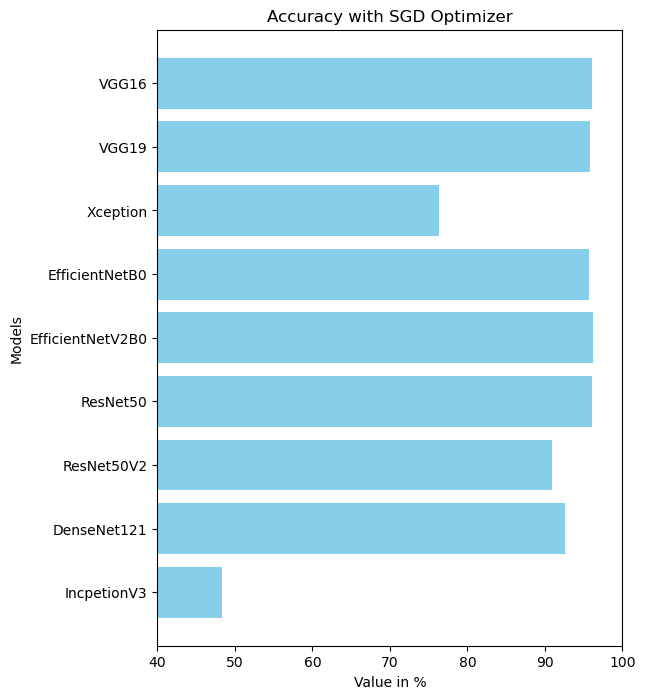

In [42]:
Models = ['IncpetionV3', 'DenseNet121','ResNet50V2', 'ResNet50', 'EfficientNetV2B0', 'EfficientNetB0', 'Xception', 'VGG19', 'VGG16']
Scores = [48.32,92.53,90.94,96.03,96.18,95.73,76.37,95.88,96.03]
plt.figure(figsize=(6, 8))
plt.barh(Models, Scores, color='skyblue')
plt.xlim(40, 100)
plt.ylabel('Models')
plt.xlabel('Value in %')
plt.title('Accuracy with SGD Optimizer')
plt.show()

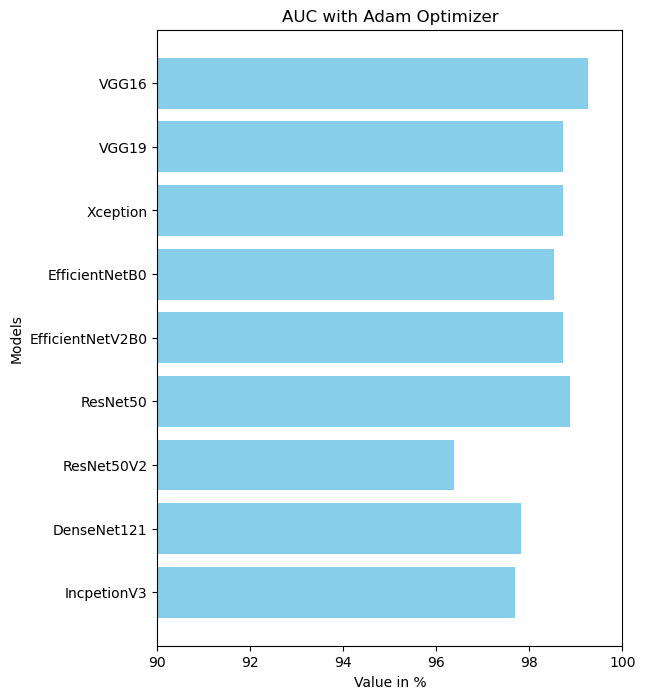

In [43]:
Models = ['IncpetionV3', 'DenseNet121','ResNet50V2', 'ResNet50', 'EfficientNetV2B0', 'EfficientNetB0', 'Xception', 'VGG19', 'VGG16']
Scores = [97.68,97.81,96.38,98.87,98.72,98.52,98.72,98.73,99.26]
plt.figure(figsize=(6, 8))
plt.barh(Models, Scores, color='skyblue')
plt.xlim(90, 100)
plt.ylabel('Models')
plt.xlabel('Value in %')
plt.title('AUC with Adam Optimizer')
plt.show()

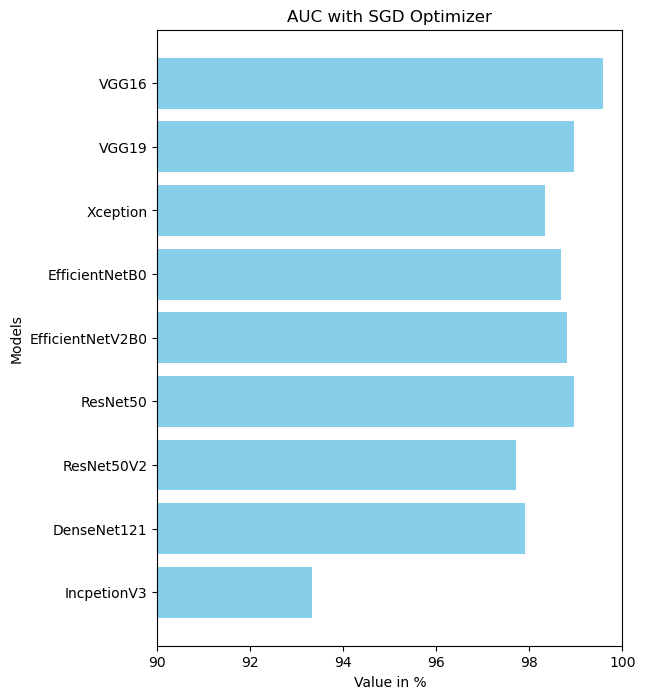

In [44]:
Models = ['IncpetionV3', 'DenseNet121','ResNet50V2', 'ResNet50', 'EfficientNetV2B0', 'EfficientNetB0', 'Xception', 'VGG19', 'VGG16']
Scores = [93.33,97.91,97.71,98.95,98.8,98.67,98.33,98.95,99.59]
plt.figure(figsize=(6, 8))
plt.barh(Models, Scores, color='skyblue')
plt.xlim(90, 100)
plt.ylabel('Models')
plt.xlabel('Value in %')
plt.title('AUC with SGD Optimizer')
plt.show()

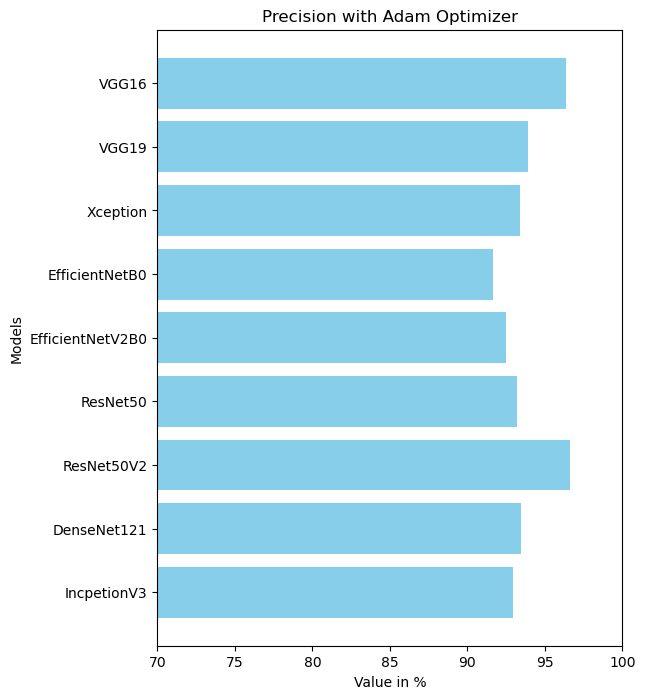

In [57]:
Models = ['IncpetionV3', 'DenseNet121','ResNet50V2', 'ResNet50', 'EfficientNetV2B0', 'EfficientNetB0', 'Xception', 'VGG19', 'VGG16']
Scores = [92.91,93.49,96.59,93.2,92.46,91.64,93.39,93.94,96.34]
plt.figure(figsize=(6, 8))
plt.barh(Models, Scores, color='skyblue')
plt.xlim(70, 100)
plt.ylabel('Models')
plt.xlabel('Value in %')
plt.title('Precision with Adam Optimizer')
plt.show()

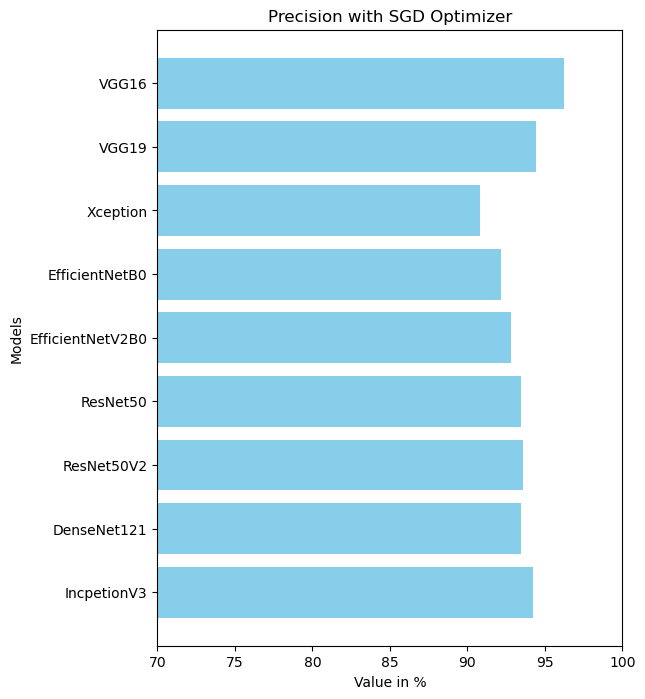

In [58]:
Models = ['IncpetionV3', 'DenseNet121','ResNet50V2', 'ResNet50', 'EfficientNetV2B0', 'EfficientNetB0', 'Xception', 'VGG19', 'VGG16']
Scores = [94.26,93.45,93.57,93.44,92.84,92.15,90.81,94.45,96.26]
plt.figure(figsize=(6, 8))
plt.barh(Models, Scores, color='skyblue')
plt.xlim(70, 100)
plt.ylabel('Models')
plt.xlabel('Value in %')
plt.title('Precision with SGD Optimizer')
plt.show()

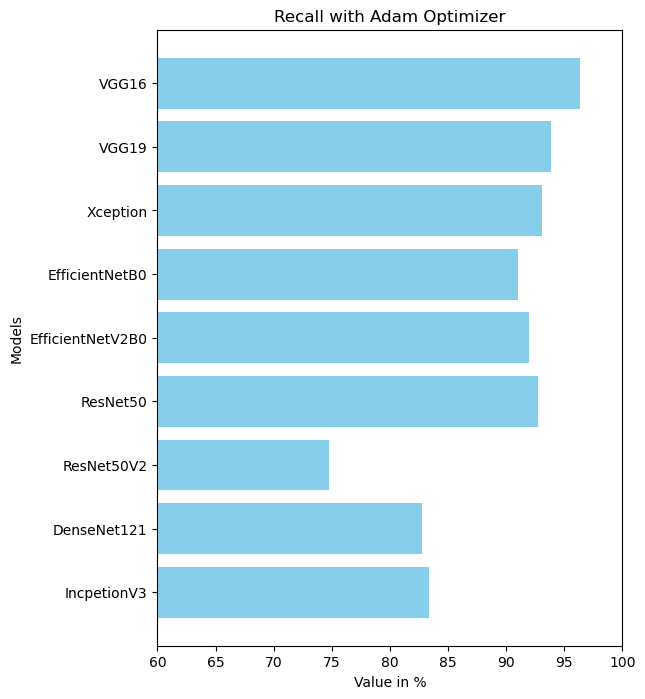

In [56]:
Models = ['IncpetionV3', 'DenseNet121','ResNet50V2', 'ResNet50', 'EfficientNetV2B0', 'EfficientNetB0', 'Xception', 'VGG19', 'VGG16']
Scores = [83.33,82.75,74.74,92.74,91.93,91.03,93.11,93.89,96.34]
plt.figure(figsize=(6, 8))
plt.barh(Models, Scores, color='skyblue')
plt.xlim(60, 100)
plt.ylabel('Models')
plt.xlabel('Value in %')
plt.title('Recall with Adam Optimizer')
plt.show()

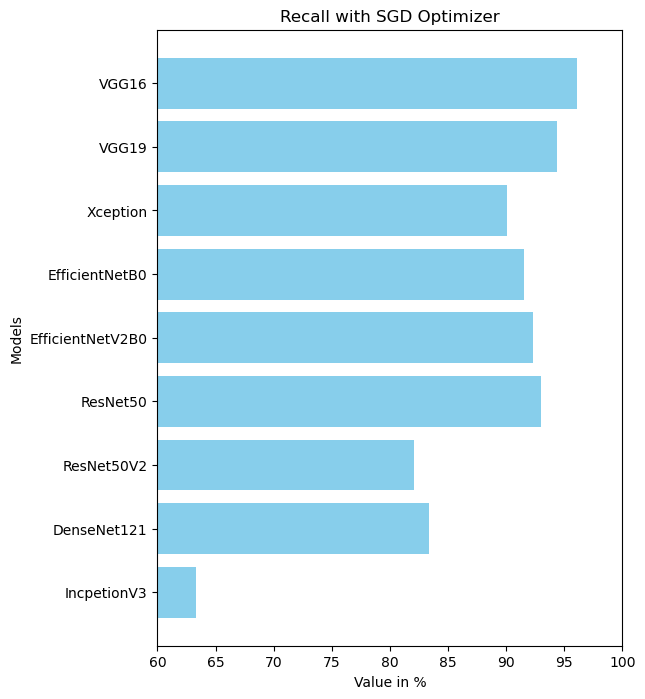

In [49]:
Models = ['IncpetionV3', 'DenseNet121','ResNet50V2', 'ResNet50', 'EfficientNetV2B0', 'EfficientNetB0', 'Xception', 'VGG19', 'VGG16']
Scores = [63.3,83.33,82.06,93.01,92.35,91.55,90.1,94.38,96.13]
plt.figure(figsize=(6, 8))
plt.barh(Models, Scores, color='skyblue')
plt.xlim(60, 100)
plt.ylabel('Models')
plt.xlabel('Value in %')
plt.title('Recall with SGD Optimizer')
plt.show()

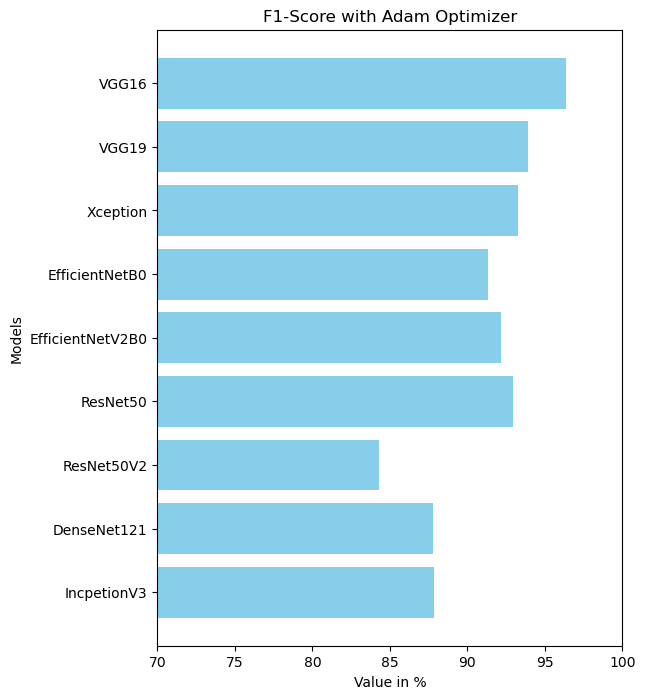

In [55]:
Models = ['IncpetionV3', 'DenseNet121','ResNet50V2', 'ResNet50', 'EfficientNetV2B0', 'EfficientNetB0', 'Xception', 'VGG19', 'VGG16']
Scores = [87.86,87.8,84.27,92.97,92.19,91.33,93.25,93.92,96.34]
plt.figure(figsize=(6, 8))
plt.barh(Models, Scores, color='skyblue')
plt.xlim(70, 100)
plt.ylabel('Models')
plt.xlabel('Value in %')
plt.title('F1-Score with Adam Optimizer')
plt.show()

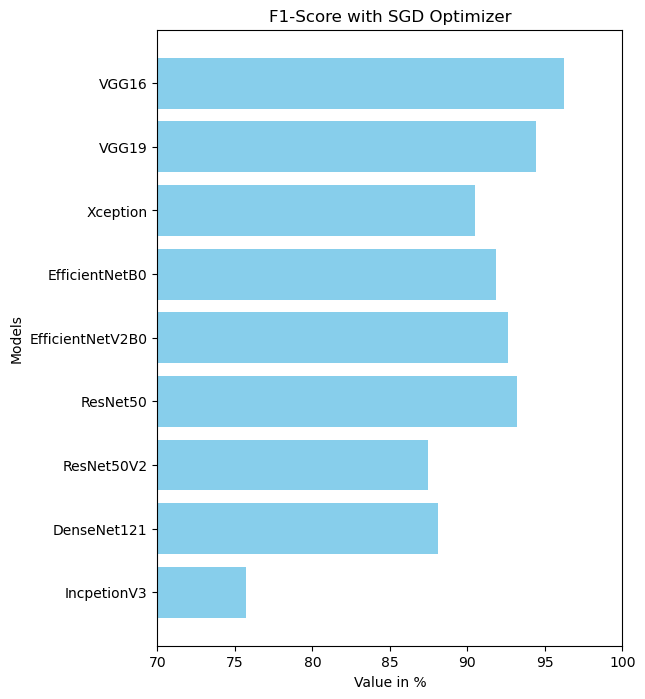

In [54]:
Models = ['IncpetionV3', 'DenseNet121','ResNet50V2', 'ResNet50', 'EfficientNetV2B0', 'EfficientNetB0', 'Xception', 'VGG19', 'VGG16']
Scores = [75.74,88.11,87.44,93.22,92.6,91.85,90.46,94.42,96.22]
plt.figure(figsize=(6, 8))
plt.barh(Models, Scores, color='skyblue')
plt.xlim(70, 100)
plt.ylabel('Models')
plt.xlabel('Value in %')
plt.title('F1-Score with SGD Optimizer')
plt.show()

# Prediction Using VGG16 Model

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [15]:
model = load_model('C:/Users/mbk02/Documents/Brain/Models/VGG16-Adam.h5')

In [16]:
img_path = r"C:\Users\mbk02\Documents\Brain\Testing\pituitary\Te-pi_0036.jpg"

In [17]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
class_labels = ['Glioma','Meningioma','No Tumor','Pituitary']
pred = np.argmax(preds, axis=-1)
print(class_labels[pred[0]])

1/1 [==============================] - 1s 694ms/step
Pituitary
